<a href="https://colab.research.google.com/github/dacq-trap/MachineLearningWorkshop/blob/main/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E8%AC%9B%E7%BF%92%E4%BC%9A%E7%AC%AC%E4%BA%8C%E5%9B%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 機械学習講習会第二回

## 今回やりたいこと
数字を認識する簡単なモデルを構築し、実行することをやってみようと思います。

## データの準備
今回はMNISTと呼ばれる画像認識では有名なデータセットを使いたいと思います。さてMNISTのデータはhttp://yann.lecun.com/exdb/mnist/ にてダウンロードできるので、これをwgetでダウンロードして解凍...としたいところですが、解凍された画像ファイルはpngなどではなく、バイナリファイルとして構成されており、そのまま扱うと非常に面倒です。なので、今回はpytorchのライブラリを頼ることにします。

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np

rootpath="./data"

transform = transforms.Compose(#入力画像の整形
    [transforms.ToTensor()])
trainset = torchvision.datasets.MNIST(root=rootpath, 
                                        train=True,
                                        download=True,
                                        transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,
                                            #batch_size=3,
                                            shuffle=True)

evalset = torchvision.datasets.MNIST(root=rootpath, 
                                        train=False, 
                                        download=True, 
                                        transform=transform)
evalloader = torch.utils.data.DataLoader(evalset, 
                                            #batch_size=3,
                                            shuffle=False)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



上のコードには見慣れないものがたくさんあると思いますが、ひとまずtrainset,evalsetに画像トラベルの情報が配列の形で入っています。ひとまず以下のコードを実行してみてください。

In [ ]:
img, label=trainset[0]#これで一つのデータが(画像、ラベル)の形で取れる
print(img)#表示させてみる
print(label)#表示させてみる
print("shape of img is {}".format(img.shape))#画像の形の確認

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0824, 0.6784, 0.9922,
           0.7961, 0.0000, 0.0000, 0.0000, 

やたら大きい配列と整数値が一つが表示されると思います。それぞれが画像のデータと、そのラベルとなります。画像を具体的に白黒で表示させてみるためには、以下のようにします。

class is 4


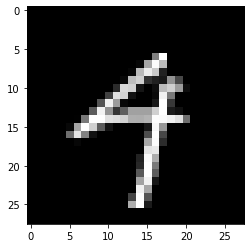

In [ ]:
size = img.shape[-1]#画像の一辺の大きさ
img = np.reshape(img,[size,size])#画像表示の都合で形を変える

import matplotlib.pyplot as plt#画像表示用のライブラリ

plt.imshow(img,cmap='gray')
print("class is {}".format(label.numpy()[0]))

## モデルの構築
次に、モデルを具体的に構築してみましょう。機械学習のモデルの定義を以下のクラスで書きます。(https://rightcode.co.jp/blog/information-technology/pytorch-mnist-learning にあったものをお借りして、ある程度手直ししました。)

In [ ]:
class MyNet(torch.nn.Module):#モデルの定義
    def __init__(self):
        super(MyNet, self).__init__()
        #ここでパラメータのインスタンスを定義する必要がある
        self.fc1 = torch.nn.Linear(28*28, 1000)# 全結合層fc1の定義
        self.fc2 = torch.nn.Linear(1000, 10)# 全結合層fc2の定義
 
    def forward(self, x):#データを入力されたときの処理。
        x = self.fc1(x)
        x = torch.sigmoid(x)#活性化関数
        x = self.fc2(x)
        #確率の形で出力させる
        x = torch.nn.functional.softmax(x, dim=-1)
        return x

## 学習の実行
とりあえず上からセルを順に実行してみましょう。訓練と評価を一通りできます。

In [ ]:
# 学習の進捗表示用(progress barみたいなものが使えるようになる)のものです。とりあえず実行してください。
!pip install tqdm
from tqdm import tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#評価用のメソッドの定義
def getaccuracy_eval(net: torch.nn.Module,needProgressbar=False):
    correct=0
    eval_datanum=len(evalset)#evalのデータセットの個数
    #progress barの表示について
    if needProgressbar:
      array=tqdm(range(eval_datanum))
    else:
      array=range(eval_datanum)
    #勾配は記録しない
    with torch.no_grad():
      for i in array:
          img, label=evalset[i]#imgが画像、labelが0-9のどれかを表す
          #全結合層に入れたいので、実装の都合上形が1次元のベクトルにする
          img=torch.reshape(img, (28*28,))
          output = net(img)
          #outputの中で最も値が大きいところのindexを取る
          pred = output.argmax(dim=-1, keepdim=True)
          #label == predならば、正答とする
          if label == pred:
              correct += 1
          #正答率を返す
    return correct/eval_datanum


In [ ]:
#モデルの訓練をするセルです
# 学習回数(データセット全体を何回見るかという意味)
epoch = 1

# ネットワークを構築
net: torch.nn.Module = MyNet()#:の後の torch.nn.Moduleは型宣言のためのもの
optimizer = torch.optim.Adam(params=net.parameters(), lr=0.001)

#もし訓練が非常に重いという方がいたら、このtraindatanum変数を適度に小さくすると、訓練を途中で切り上げます
traindatanum=len(trainset)#trainのデータセットの個数
#正答率の履歴を格納
acc_history=[]
Evaluation_Interval=1000
step_count = 0

for e in range(epoch):

    loss = None
    # 学習開始 (再開)
    net.train(True)  # 引数は省略可能
    print("epoch : {}".format(e))
    for i in tqdm(range(traindatanum)):
        #データのロード
        img, label=trainset[i]#imgが画像、labelが0-9のどれかを表す
        #全結合層に入れたいので、実装の都合上形が1次元のベクトルにする
        img=torch.reshape(img, (28*28,))
        #勾配の初期化(RNNモデルなどではこの操作が重要となる)
        optimizer.zero_grad()
        #順伝播の実行
        output = net(img)
        #損失関数
        lossfunc = torch.nn.CrossEntropyLoss()

        #ちなみに、このように書いても上手くいきません。 torch.nn.CrossEntropyLoss()は損失を計算するためのものではなく、損失関数オブジェクトを返すからです。
        #loss = torch.nn.CrossEntropyLoss(output, label)
        
        #損失関数のオブジェクトに損失を計算させる。
        loss = lossfunc(output, torch.tensor(label,dtype=torch.long))
        #これで誤差逆伝播を実行、勾配を計算する(あくまで計算しただけ)
        loss.backward()
        #パラメータを更新する
        optimizer.step()
        #学習の記録を残す
        if step_count % Evaluation_Interval == 0:
            acc = getaccuracy_eval(net)
            acc_history.append(acc)
        step_count += 1

acc = getaccuracy_eval(net)
acc_history.append(acc)
print("training end")

epoch : 0


100%|██████████| 60000/60000 [15:33<00:00, 64.24it/s]


training end


accuracy history


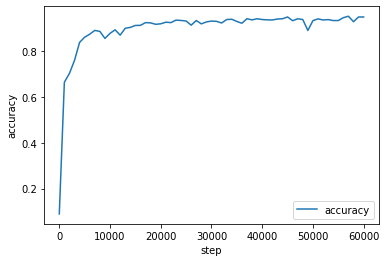

start evaluation


100%|██████████| 10000/10000 [00:05<00:00, 1820.74it/s]

/n
final accuracy is 0.9483


In [ ]:
# 訓練が終わったので、具体的に評価してみる
# テストデータ全てを評価してみて、その結果を見る

eval_datanum=len(evalset)
print("accuracy history")
import matplotlib.pyplot as plt
import numpy as np
#x軸の表示用の配列
x_axis_array=[i*Evaluation_Interval for i in range(len(acc_history))]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(x_axis_array, acc_history, label='accuracy')

ax.legend()
ax.set_xlabel("step")
ax.set_ylabel("accuracy")

plt.show()
correct = 0
print("start evaluation")
acc = getaccuracy_eval(net,needProgressbar=True)
print("/n")
print("final accuracy is {}".format(acc)) 

私の環境では、accuracyは約0.94となりました。
## コードや用語等の解説

* optimizer

機械学習を実装する際、Optimizerと呼ばれるものを構築することが多いです。これは簡単に言うと、「どのようにパラメータを構築していきますか？」を定義するものです。今回はAdamと呼ばれるアルゴリズムを用います。

* epoch

データセットを全体で何回見るか？を意味します。例えば、100個の訓練データがあるうえで、200回勾配を更新するときに、各々のデータは2回見られるので、epochは2となります。今回は時間の都合上、1epochだけの実行にしておきましょう。

* accuracy

(評価データの中で実際に正解したものの個数)/(評価のデータ個数)です。つまり、モデルの正答率です。

## 実行時間計測
以上で学習が一通りできたわけですが、せっかくなので実行時間の計測もやってみましょう。例えばを加算演算を10000000回回す処理を計測してみるときは、

In [ ]:
import time

# 時間計測開始
time_start = time.time()
sum = 0
# 処理を書く（ここでは1秒停止する）
for i in range(10000000):
  sum += 1
# 時間計測終了
time_end = time.time()
# 経過時間（秒）
tim = time_end- time_start

print("time : {}s".format(tim))

0.9254546165466309


でできます.私の環境下では約0.9秒でした。皆さんはどうでしょうか？
これを以下のように組み込むと、こうなります。

In [ ]:
import time
# 学習回数
epoch = 1

net: torch.nn.Module = MyNet()
optimizer = torch.optim.Adam(params=net.parameters(), lr=0.001)

traindatanum=len(trainset)
acc_history=[]
Evaluation_Interval=1000
step_count = 0

# 時間計測開始
time_start = time.time()
for e in range(epoch):

    loss = None
    net.train(True)
    print("epoch : {}".format(e))
    for i in tqdm(range(traindatanum)):
        img, label=trainset[i]
        img=torch.reshape(img, (28*28,))
        optimizer.zero_grad()
        output = net(img)
        lossfunc = torch.nn.CrossEntropyLoss()
        loss = lossfunc(output, torch.tensor(label,dtype=torch.long))
        loss.backward()
        optimizer.step()
        if step_count % Evaluation_Interval == 0:
            acc = getaccuracy_eval(net)
            acc_history.append(acc)
        step_count += 1
# 時間計測終了
time_end = time.time()
# 経過時間（秒）
tim = time_end- time_start
print("time : {}s".format(tim))
acc = getaccuracy_eval(net)
acc_history.append(acc)
print("training end")

epoch : 0


100%|██████████| 60000/60000 [16:58<00:00, 58.93it/s]


time : 1018.1011118888855s
training end


私の環境では1000秒ほどかかりました。

# 演習
* 畳み込み演算

画像処理では畳み込み演算と呼ばれる層がよく用いられます。
https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html に細かいAPIが書いてあるので、頑張って解読して実装してみましょう。できれば実行時間の比較等もしてみると面白いと思います。(私の場合、英語がわからなかったらDeepLを使います。)

In [ ]:
class MyNet(torch.nn.Module):#モデルの定義
    def __init__(self):
        super(MyNet, self).__init__()
        #ここでパラメータのインスタンスを定義する必要がある
        #畳み込み演算用のインスタンスを新しく定義する
        self.fc1 = torch.nn.Linear(28*28, 1000)
        self.fc2 = torch.nn.Linear(1000, 10)
 
    def forward(self, x):#データを入力されたときの処理。
        #forward処理のどこかに畳み込み演算を入れてみる
        x = self.fc1(x)
        x = torch.sigmoid(x)
        x = self.fc2(x)
        x = torch.nn.functional.softmax(x, dim=-1)
        return x


* 自分の作った画像を認識させる

左の空間で右クリックすることで画像のアップロードができます。28×28のモノクロ画像を用意して、先ほど学習させたモデルにpredictさせてみましょう。

In [ ]:
file_path = "./{}".format()#ここに画像ファイル名を入力

#画像を頑張ってモノクロにするなどして、netがpredictできるようにする処理を書く

output = net(img)
print("output : {}".format())